<a href="https://colab.research.google.com/github/yanghyeon408/OpenCV/blob/master/03%EA%B8%B0%ED%95%98%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3장 기하변환  


#3.1크기변경

In [ ]:
import numpy as np
import cv2

In [ ]:
def scale_nogood(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height*scale_y), int(width*scale_x)), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            try:
                img_[int(y*scale_y), int(x*scale_x)] = img[y, x]
            except:
                pass
    return img_


In [ ]:
def img_pro(func, img, *args, output=True, **kwargs):
    img_ = func(img, *args, **kwargs)
    if output:
        from google.colab.patches import cv2_imshow
        cv2_imshow(img_)
    else:
        return img_

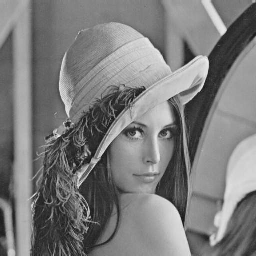

In [ ]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(scale_nogood, img, .5, 0.5)

#3.2 보간법

##최근방법, 반올림하는 것

In [ ]:
def scale_nearest(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height*scale_y), int(width*scale_x)), dtype=np.uint8)

    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            try:
                img_[y, x] = img[int(y/scale_y), int(x/scale_x)]
            except:
                pass
    return img_

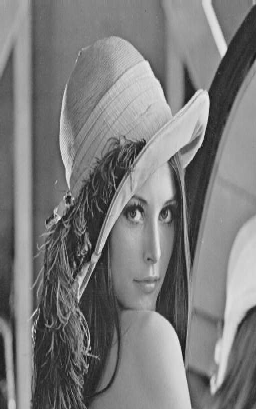

In [ ]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(scale_nearest, img, .5, 0.8)

##선형방법: 반대쪽의 거리를 곱한다

In [ ]:
def scale_bilinear(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height*scale_y), int(width*scale_x)), dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            p = x/scale_x - int(x/scale_x)
            q = y/scale_y - int(y/scale_y)
            try:
                X =int(x/scale_x)
                Y =int(y/scale_y)
                value = (1-p)*(1-q)*img[Y, X] + p*(1-q)*img[Y+1, X] \
                  + (1-p)*q*img[Y, X+1] + p*q*img[Y+1, X+1]
                if value > 255:
                    img_[y, x] = 255
                else:
                    img_[y, x] = int(value)
            except:
                pass
    return img_    


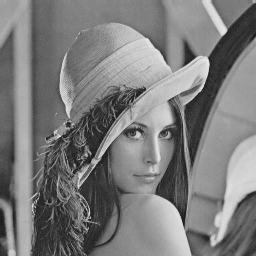

In [ ]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(scale_bilinear, img, .5, 0.5)

머리카라 부분이 경계가 커서 화소차이가 크다 그부분이 많이 뽑혀서 머리카락 부분이 저렇게 보이는것

##maxpool2d 구현

In [ ]:
def maxpool2d(img):
    height, width = img.shape
    img_ = np.zeros((int(height/2), int(width/2)), dtype=np.uint8)

    for y in range(int(height/2)):
        for x in range(int(width/2)):
            try:
                img_[y,x] = np.max(img[2*y:2*y+2, 2*x:2*x+2])
            except:
                pass
    return img_

이미지를 1/2로 줄엿으니깐 img_[y,x]에는 2y, 2x 한거를 넣어 준다

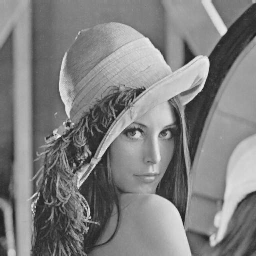

In [ ]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(maxpool2d, img)

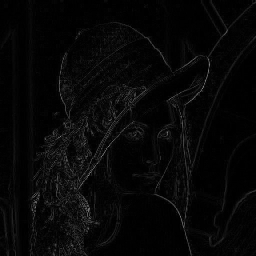

In [ ]:
img = cv2.imread('black_lena.png', cv2.IMREAD_GRAYSCALE)
img_pro(scale_nearest, img, .5, 0.5)

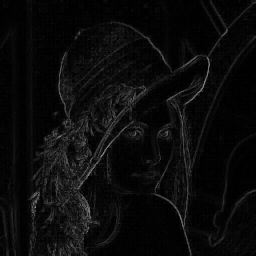

In [ ]:
img = cv2.imread('black_lena.png', cv2.IMREAD_GRAYSCALE)
img_pro(maxpool2d, img)

#3.3 회전

In [ ]:
import numpy as np


def rotate(img, deg=30):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    theta = np.pi / (180.0 / deg)
    center_x = int(width /2)
    center_y = int(height / 2)

    for y in range(height):
        for x in range(width):
            X = int((x-center_x)*np.cos(theta) + (y-center_y)*np.sin(theta)) + center_x
            Y = int(-(x-center_x)*np.sin(theta) +(y-center_y)*np.cos(theta)) + center_y
            if (X < 0) | (X>= width) | (Y < 0) | (Y >= height):
                continue
            img_[Y, X] = img[y, x]

    return img_

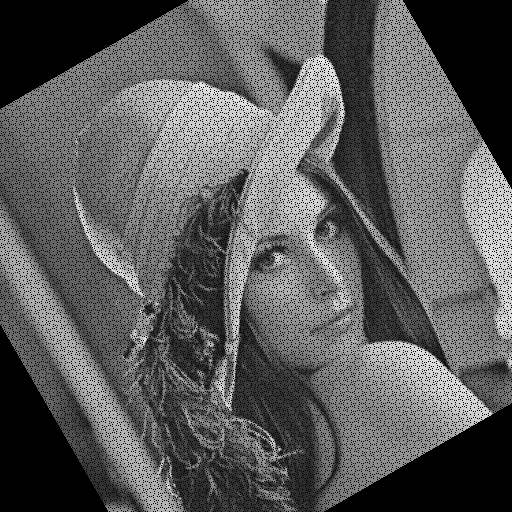

In [ ]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(rotate, img)

In [ ]:
import numpy as np


def rotate(img, deg=30):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    theta = np.pi / (180.0 / deg)
    center_x = int(width /2)
    center_y = int(height / 2)

    for y in range(height):
        for x in range(width):
            X = int((x-center_x)*np.cos(theta) + (y-center_y)*np.sin(theta)) + center_x
            Y = int(-(x-center_x)*np.sin(theta) +(y-center_y)*np.cos(theta)) + center_y
            if (X < 0) | (X>= width) | (Y < 0) | (Y >= height):
                continue
            img_[Y, X] = img[y, x]
            
    for y in range(height - 1):
        for x in range(width -1):
            if img_[y, x] == 0:
                outer = [img_[y-1, x-1], img_[y-1, x], img_[y-1,x+1],
                         img_[y  , x-1],               img_[y,  x+1],
                         img_[y+1, x-1], img_[y+1, x], img_[y+1,x+1]]
                img_[y, x] = np.uint8(np.mean(outer))
    return img_

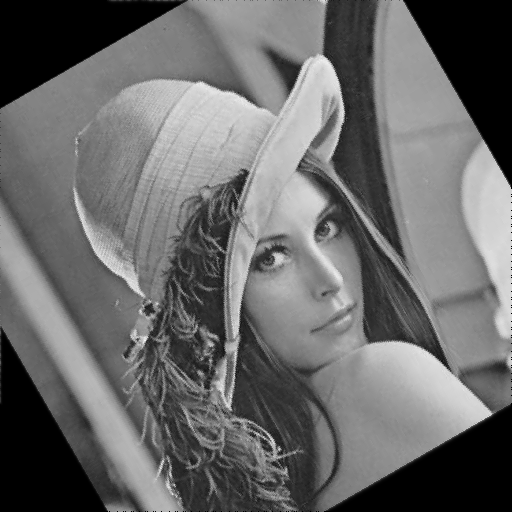

In [ ]:
#img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(rotate, img)

#3.4 Affine 변환

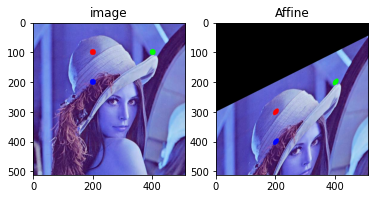

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200, 100], [400, 100], [200,200]])
pts2 = np.float32([[200, 300], [400, 200], [200,400]])

# 10 은 점 크기 -1은 점 full로 색 칠하는 것
cv2.circle(img, (200,100), 10, (255, 0, 0), -1)
cv2.circle(img, (400,100), 10, (0,255,0), -1)
cv2.circle(img, (200, 200), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('image')
plt.subplot(122), plt.imshow(dst), plt.title('Affine')
plt.show()

perspective 변환

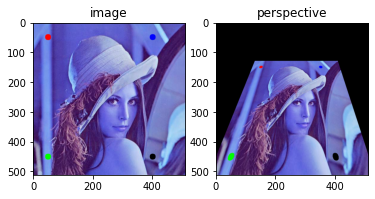

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
#[x, y] 좌표점을  4x2의 행렬로 작성
# 좌표점은 좌상->조ㅏ하->우상->우하
pts1 = np.float32([[50, 50], [50, 450], [400, 50], [400, 450]])

# 좌표의 이동점
pts2 = np.float32([[150, 150], [50, 450], [350, 150], [400, 450]])

#pts1의 좌표에 표시. perspective  변환 후 이동 점 확인
cv2.circle(img, (50, 50), 10, (255, 0, 0), -1)    #레드
cv2.circle(img, (50, 450), 10, (0, 255, 0), -1)   #그린
cv2.circle(img, (400, 50), 10, (0, 0, 255), -1)   #블루
cv2.circle(img, (400, 450), 10, (0, 0, 0), -1)   #검정

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (512, 512))

plt.subplot(121), plt.imshow(img), plt.title('image')
plt.subplot(122), plt.imshow(dst), plt.title('perspective')
plt.show()